# TASK 2: PREDICTION USING UNSUPERVISED ML

Predict the optimum number of clusters and represent it visually

 Data Science & Business Analytics Tasks

Name: Prajwal.S

In [1]:
#importing the libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Reading the datatset
data=pd.read_csv('Iris.csv')

In [4]:
data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


Data Preprocessing

In [6]:
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


We can infer there are no null values in the given dataset present 

In [8]:
#Setting Id as the index column
data.set_index("Id",inplace=True)

In [9]:
data['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

# Visualisation

In [10]:
from pandas_profiling import ProfileReport
profile=ProfileReport(data,title='Profile Report',explorative=True)

In [11]:
profile.to_widgets()

In [12]:
profile.to_file('output.file')

C:\Users\anagha141\3DObjects\lib\site-packages\pandas_profiling\profile_report.py:266: UserWarning: Extension .file not supported. For now we assume .html was intended. To remove this warning, please use .html or .json.
  warnings.warn(


# corelation

In [8]:
data.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


HEATMAP

<AxesSubplot:>

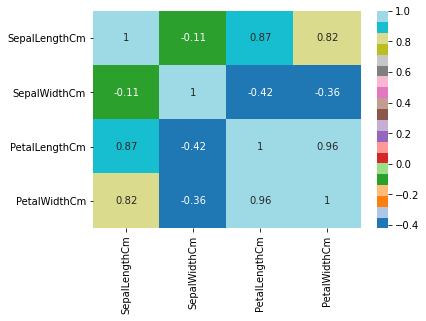

In [9]:
sns.heatmap(data.corr(),cmap='tab20',annot=True)

Inferences about collinearity:
1)SepalLengthCm has high positive corelation with PetalLength & PetalWidth
2)SepalWidth has negative corelation with PetallLength & PetalWidth
3)PetalLength has High Positive Corelation with PetalWidth & SepalLengthCm
4)PetalWidth Has positive corelation with SepalLength & negative corelation with SepalLengthCm 

In [14]:
#Converting the Species coloumn from categorical to number
from sklearn.preprocessing import LabelEncoder
lm=LabelEncoder()
data['Species']=lm.fit_transform(data['Species'])

Elbow-Method: method to find the optimum number of clusters 

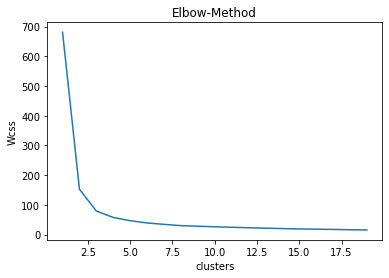

In [15]:
feature_names=data.iloc[:,[0,1,2,3]].values
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,20):
    kmeans=KMeans(n_clusters=i,random_state=0)
    kmeans.fit(feature_names)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,20),wcss)
plt.title("Elbow-Method")
plt.xlabel("clusters")
plt.ylabel("Wcss")
plt.show()

By the elbow method we come to a conclusion that the optimum number of clusters is 3 

In [16]:
#Applying k-meansclustering  to the dataset
kmeans=KMeans(n_clusters=3,random_state=0)
predicted=kmeans.fit_predict(feature_names)
kmeans.inertia_

78.94084142614601

In [17]:
feature_names

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [18]:
kmeans.cluster_centers_

array([[6.85      , 3.07368421, 5.74210526, 2.07105263],
       [5.006     , 3.418     , 1.464     , 0.244     ],
       [5.9016129 , 2.7483871 , 4.39354839, 1.43387097]])

In [19]:
kmeans.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2])

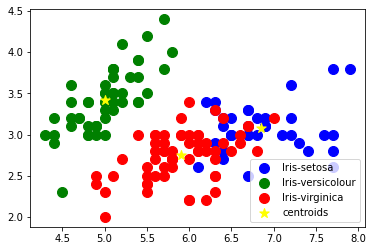

In [20]:
#Visualising the  clusters only for first two columns

plt.scatter(feature_names[predicted == 0, 0],feature_names[predicted == 0, 1],s=100,color='Blue',label='Iris-setosa')
plt.scatter(feature_names[predicted == 1, 0],feature_names[predicted == 1, 1],s=100,color='Green',label='Iris-versicolour')
plt.scatter(feature_names[predicted == 2, 0],feature_names[predicted == 2, 1],s=100,color='Red',label='Iris-virginica')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],marker='*',label='centroids',s=100,color='Yellow')
plt.legend()

In [21]:
#Silhouette Score
from sklearn.metrics import silhouette_score
score_1=silhouette_score(feature_names,predicted)
score_1

0.5525919445499755

In [25]:
kmeans2=KMeans(n_clusters=5,random_state=0)
predicted_2=kmeans2.fit_transform(feature_names)
kmeans2.inertia_

46.535582051282034

# Thus I conclude that the optimum number of clusters is 3


# THANK YOU